# Checkpoint 1, Part 1

**The checkpoint will be handed in as a single notebook. The template for the final notebook will be distributed at a later date. The due date for checkpoint 1 will be 5:00pm on the third day following the workshop to which you have been allocated. Exact dates are below.**

### Due dates:
* Tuesday workshop: Friday, 11 October, 2019 at 5:00pm
* Friday workshop: Monday, 14 October, 2019 at 5:00pm

The goals for Checkpoint 1, Part 1 are to complete the first two tasks:

1. Write a code that calculates V(r) numerically for $\alpha$=0.1 and plots it for r=0.01...1nm.

2. Compare the analytic expression for V(r) (what is it?) with numerically obtained values for r=0.01,0.02...1nm. The biggest relative difference,
$
\large
\begin{align}
|V_{exact}(r)-V_{numerical}(r)|
\end{align}
$
must be smaller than 10$^{-5}$ eV.

The Coulomb law is given by:

$
\Large
\begin{align}
F(r) = -\frac{e^{2}}{4 \pi \epsilon_{0} r^{2}} \left( \frac{r}{r_{0}} \right)^{\alpha},
\end{align}
$

where $r_{0}$ is the Bhor radius, given by:

$
\Large
\begin{align}
r_{0} = \frac{4 \pi \epsilon_{0} \hbar^{2}}{m e^{2}}.
\end{align}
$

The electric potential is given by:

$
\Large
\begin{align}
V(r) = \int_{r}^{\infty} F(r^{\prime}) dr^{\prime}
\end{align}
$

Use the following constants:
* $\frac{\hbar^{2}}{2m} = 0.0380998\ nm^{2} eV$ (called `c1` below)
* $\frac{e^{2}}{4 \pi \epsilon_{0}} = 1.43996\ nm\ eV$ (called `c2` below)
* $r_{0} = 0.0529177\ nm$ (called `r0` below)
* Planck constant $h = 6.62606896\times10^{-34} J s$ (`h`)
* Speed of light $c = 299792458\ m/s$ (`c`)

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import quad

from scipy.sparse import diags
from scipy.sparse.linalg import eigs

from scipy.optimize import brentq

In [41]:
# Constants
c1 = 0.0380998 # nm^2 eV
c2 = 1.43996 # nm eV
r0 = 0.0529177 # nm
h  = 6.62606896e-34 # J s
c  = 299792458. # m/s

In [42]:
alpha = 0.01
r_min = 0.01
r_max = 1
interval = 0.01

In [43]:
def calc_force(r, alpha):
    return -1*c2*r**(-2)*(r/r0)**alpha

In [44]:
def calc_potential(r_lower, alpha):
    ans, err = quad(calc_force, r_lower, np.inf, args=(alpha,))
    return ans, err

In [45]:
r_lower_array = np.arange(r_min, r_max + interval, interval)
#print(r_lower_array)

In [46]:
def get_V_array(r_lower_array, alpha):
    potential_array = np.zeros(len(r_lower_array))
    error_array = np.zeros(len(r_lower_array))
    for i in range(len(r_lower_array)):
        potential_array[i] = calc_potential(r_lower_array[i], alpha)[0]
        error_array[i] = calc_potential(r_lower_array[i], alpha)[1]
    return potential_array

potential_array = get_V_array(r_lower_array, alpha)
#print(potential_array)

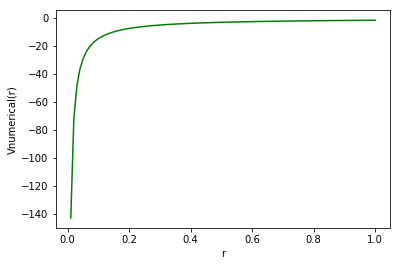

In [47]:
plt.plot(r_lower_array, potential_array, 'g')
plt.xlabel('r')
plt.ylabel('Vnumerical(r)')
plt.show()

In [48]:
#analytical solution done outside program
def potential_analytical(r):
    return -c2/(r0**alpha*(1-alpha)*r**(1-alpha))

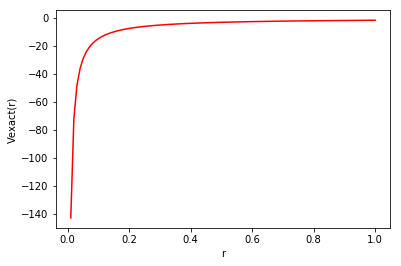

In [49]:
plt.plot(r_lower_array, potential_analytical(r_lower_array), 'r')
plt.xlabel('r')
plt.ylabel('Vexact(r)')
plt.show()

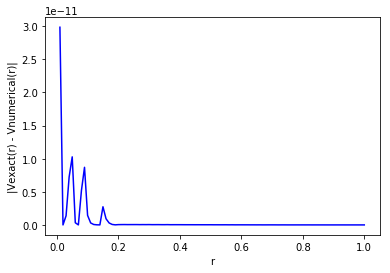

greatest difference: 2.984279490192421e-11 eV
at r = [0.01]


In [50]:
diff_array = abs(potential_analytical(r_lower_array) - potential_array)

plt.plot(r_lower_array, diff_array, 'b')
plt.xlabel('r')
plt.ylabel('|Vexact(r) - Vnumerical(r)|')
plt.show()

print('greatest difference: ' + str(max(diff_array)) + ' eV')
index = np.where(diff_array == max(diff_array))[0]
print('at r = ' + str(r_lower_array[index]))

In [51]:
r_maximum = 4
N = 2000
start = r_maximum/N
k = 2

In [52]:
def get_r_array(start, r_maximum, N):
    return np.linspace(start, r_maximum, N)

In [53]:
new_r_array = get_r_array(start, r_maximum, N)

In [54]:
def get_delta_r(r_maximum, N):
    return r_maximum/N

In [55]:
delta_diagonals = [np.full((N),  -2),
             np.full((N-1), 1),
             np.full((N-1), 1)]

delta_r = get_delta_r(r_maximum, N)

delta_matrix = (1/(delta_r**2))*diags(delta_diagonals, [0, -1, 1])

In [56]:
def get_eigvals(k, alpha, new_r_array):
    new_V_array = get_V_array(new_r_array, alpha)
    V_diagonals = [new_V_array]
    V_matrix = diags(V_diagonals, [0])
    H = -1*c1*delta_matrix + V_matrix
    eigvals, eigvecs = eigs(H, k, which="SR")
    eigvals = np.real(eigvals)
    return eigvals, eigvecs

eigvals0 = get_eigvals(k, 0, new_r_array)[0]
eigvals001 = get_eigvals(k, 0.01, new_r_array)[0]
print('First two energy levels in eV:')
print('For alpha=0,')
print(eigvals0)
print('For alpha=0.01,')
print(eigvals001)

First two energy levels in eV:
For alpha=0,
[-13.60075958  -3.40110007]
For alpha=0.01,
[-13.80308575  -3.53436283]


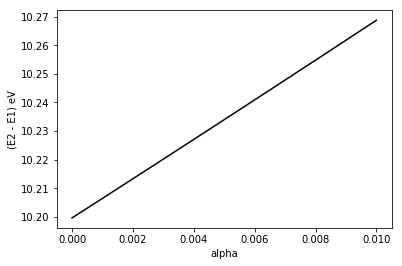

In [57]:
alpha_array = np.linspace(0, 0.01, 10)
delta_E_array = np.zeros(len(alpha_array))

for i in range(len(alpha_array)):
    E_levels = get_eigvals(k, alpha_array[i], new_r_array)[0]
    delta_E_array[i] = E_levels[1] - E_levels[0]
    
plt.plot(alpha_array, delta_E_array, 'k')
plt.xlabel('alpha')
plt.ylabel('(E2 - E1) eV')
plt.show()

In [58]:
def E_func(alpha):
    E_levels = get_eigvals(k, alpha, new_r_array)[0]
    delta_E = E_levels[1] - E_levels[0]
    return delta_E - h*c/(121.502*10**(-9)*1.60217662*10**(-19))

In [59]:
def get_max_alpha(a1, a2):
    max_alpha = brentq(E_func, a1, a2)
    return max_alpha

In [61]:
max_alpha = get_max_alpha(0, 0.01)
print('max alpha: ' + str(max_alpha))

max alpha: 0.0006781397451577841


In [62]:
E_levels = get_eigvals(k, max_alpha, new_r_array)[0]
delta_E = E_levels[1] - E_levels[0]
print(delta_E)

10.204291061033791
